<a href="https://colab.research.google.com/github/jharviy/fcc_machinelearning/blob/main/health_insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-07-03 06:03:51--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2023-07-03 06:03:51 (51.0 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
# Categorical values into numeric data

# Categorical values are converted into columns, value of the column is 1 if the sample belongs to the category
df = pd.get_dummies(dataset,
                    columns = ["region", "sex"],
                    prefix = "" ,
                    prefix_sep = ""
                    )

df["smoker"] = df["smoker"].map({"no": 0 ,"yes": 1 })
df.tail()

,age,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest,female,male
1333,50,31.0,3,0,10600.55,0,1,0,0,0,1
1334,18,31.9,0,0,2205.98,1,0,0,0,1,0
1335,18,36.9,0,0,1629.83,0,0,1,0,1,0
1336,21,25.8,0,0,2007.95,0,0,0,1,1,0
1337,61,29.1,0,1,29141.36,0,1,0,0,1,0


In [4]:
# Use 80% of the data as the train_dataset and 20% of the data as the test_dataset
train_dataset = df.sample(frac = .8, random_state = 0)
test_dataset = df.drop(train_dataset.index)

# "expenses" columns are to be used as label when training the model
train_labels, test_labels = train_dataset.pop("expenses"), test_dataset.pop("expenses")


In [5]:
# Make a model
def lin_model(df):
  normalizer = tf.keras.layers.Normalization()
  normalizer.adapt(df)  # Computes mean and variance of dataset

  model = tf.keras.Sequential()
  model.add(normalizer)
  model.add(layers.Dense(32, activation ="relu"))
  model.add(layers.Dense(1))

  opt = tf.keras.optimizers.Adam(learning_rate=0.1)
  model.compile(optimizer = opt,
                loss = "mae",
                metrics =["mae","mse"]
                )
  return model

model = lin_model(train_dataset)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 406
Trainable params: 385
Non-trainable params: 21
_________________________________________________________________


In [6]:
# Train the model in 100 epochs with validation data as 20% of the train_dataset
history = model.fit(train_dataset,
                    train_labels,
                    epochs = 100,
                    validation_split = 0.2,
                    verbose = 0
                    )

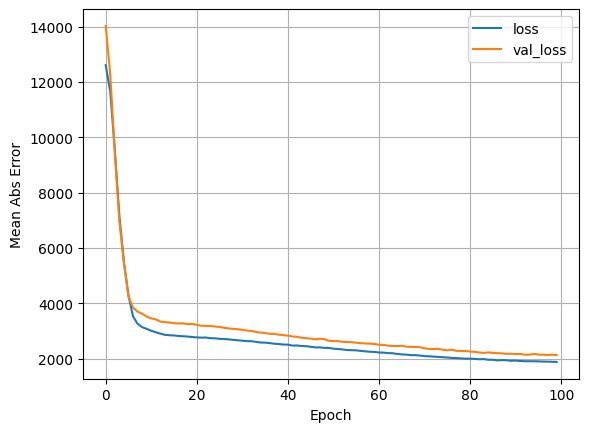

In [7]:
# Plot the "Mean Absolute Error" for each epoch
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

9/9 - 0s - loss: 2697.0166 - mae: 2697.0166 - mse: 35251112.0000 - 106ms/epoch - 12ms/step
Testing set Mean Abs Error: 2697.02 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


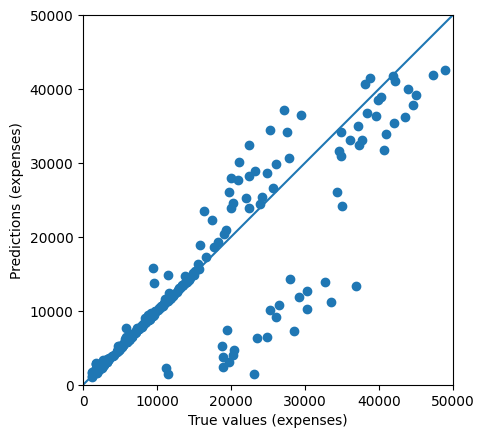

In [8]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
